In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)

In [2]:
df= pd.read_csv("../Data/MarineMicroplastics.csv")
df.head(2)

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Accession Number,Accession Link,GlobalID,CreationDate,Creator,EditDate,Editor,Long Reference,x,y
0,40055,4/3/2011 12:00:00 AM,-30.2413,-97.0948,Pacific Ocean,NaN,NaN,0.390376,pieces/m3,0.005-1,...,275968,https://www.ncei.noaa.gov/access/metadata/land...,4078602b-702b-4514-b625-4b08fb50d16c,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. ...",-1.080854e+07,-3.534605e+06
1,39794,11/27/2010 12:00:00 AM,-33.5729,-13.7057,Atlantic Ocean,NaN,NaN,0.976803,pieces/m3,0.005-1,...,275968,https://www.ncei.noaa.gov/access/metadata/land...,fff505a7-d6da-435d-9b6e-8263bf448e78,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. ...",-1.525712e+06,-3.971596e+06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13942 entries, 0 to 13941
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FID               13942 non-null  int64  
 1   Date              13942 non-null  object 
 2   Latitude          13942 non-null  float64
 3   Longitude         13942 non-null  float64
 4   Oceans            13942 non-null  object 
 5   Regions           3890 non-null   object 
 6   SubRegions        1010 non-null   object 
 7   Measurement       13942 non-null  float64
 8   Unit              13942 non-null  object 
 9   Density Range     13942 non-null  object 
 10  Density Class     13942 non-null  object 
 11  Sampling Method   13942 non-null  object 
 12  Short Reference   13942 non-null  object 
 13  DOI               13942 non-null  object 
 14  Organization      13942 non-null  object 
 15  Keywords          13855 non-null  object 
 16  Accession Number  13942 non-null  int64 

In [4]:
df.describe()

,FID,Latitude,Longitude,Measurement,Accession Number,x,y
count,13942.000000,13942.000000,13942.000000,13942.000000,13942.000000,1.394200e+04,1.394200e+04
mean,35652.500000,22.860456,-68.851821,19.875033,226976.439033,-7.664550e+06,2.739463e+06
std,4024.853062,19.959507,70.062754,530.429209,27297.838359,7.799350e+06,2.573204e+06
min,28682.000000,-71.699040,-179.994200,0.000000,170967.000000,-2.003686e+07,-1.164563e+07
25%,32167.250000,16.620000,-130.170875,0.000000,211007.000000,-1.449056e+07,1.876635e+06
50%,35652.500000,25.500000,-70.280000,0.007200,211008.000000,-7.823534e+06,2.937284e+06
75%,39137.750000,35.100000,-58.735000,0.069116,253448.000000,-6.538350e+06,4.177479e+06
max,42623.000000,81.090000,179.854333,57665.000000,276482.000000,2.002129e+07,1.627817e+07


In [5]:
df.isnull().sum()

FID                     0
Date                    0
Latitude                0
Longitude               0
Oceans                  0
Regions             10052
SubRegions          12932
Measurement             0
Unit                    0
Density Range           0
Density Class           0
Sampling Method         0
Short Reference         0
DOI                     0
Organization            0
Keywords               87
Accession Number        0
Accession Link          0
GlobalID                0
CreationDate            0
Creator                 0
EditDate                0
Editor                  0
Long Reference          0
x                       0
y                       0
dtype: int64

In [6]:
df["Date"]= pd.to_datetime(df["Date"])
df.dtypes

FID                          int64
Date                datetime64[ns]
Latitude                   float64
Longitude                  float64
Oceans                      object
Regions                     object
SubRegions                  object
Measurement                float64
Unit                        object
Density Range               object
Density Class               object
Sampling Method             object
Short Reference             object
DOI                         object
Organization                object
Keywords                    object
Accession Number             int64
Accession Link              object
GlobalID                    object
CreationDate                object
Creator                     object
EditDate                    object
Editor                      object
Long Reference              object
x                          float64
y                          float64
dtype: object

In [7]:
pd.DataFrame(df[['Oceans','Regions']].groupby('Oceans').value_counts())

0
Oceans         Regions                                                 
Arctic Ocean   Norwegian Sea                                         26
               Northwestern Passages                                 20
               Laptev Sea                                            18
               Greenland Sea                                         18
               Kara Sea                                              16
               Davis Strait                                          12
               Baffin Bay                                             7
               Barents Sea                                            6
               East Siberian Sea                                      6
               White Sea                                              3
               Chukchi Sea                                            2
               Beaufort Sea                                           2
               Hudson Strait                                          1
Atlantic Ocean Caribbean Sea                                       1765
               Mediterranean Sea                                    987
               Gulf of Mexico                                       102
               Stellwagen Bank National Marine Sanctuary             52
               Celtic Sea                                            26
               Gulf of St. Lawrence                                  25
               North Sea                                             18
               New York Bight                                        17
               Coastal Waters of Florida                             15
               Baltic Sea                                            14
               English Channel                                       11
               Black Sea                                             10
               Bay of Biscay                                         10
               Florida Keys National Marine Sanctuary                 9
               Kattegat                                               5
               Skagerrak Strait                                       4
               Labrador Sea                                           2
               Rio de La Plata                                        2
               Inner Seas off the West Coast of Scotland              2
               Gulf of Bothnia                                        1
               Rio de la Plata                                        1
Indian Ocean   Great Australian Bight                                53
               Bay of Bengal                                         34
               Mozambique Channel                                    21
               Arafura Sea                                           18
               Andaman Sea                                           15
               Timor Sea                                             11
               Red Sea                                                1
Pacific Ocean  Tasman Sea                                           102
               South China Sea                                      101
               Coral Sea                                             84
               Gulf of Alaska                                        51
               Coastal Waters of Southeast Alaska and British ...    46
               Philippine Sea                                        31
               Gulf of California                                    26
               Monterey Bay National Marine Sanctuary                11
               East China Sea                                         7
               Bering Sea                                             7
               Solomon Sea                                            6
               Papahanaumokuakea Marine National Monument             5
               Bass Strait                                            5
               Inland Sea             

In [8]:
pd.DataFrame(df[['Regions','SubRegions']].groupby('Regions').value_counts())

0
Regions                   SubRegions                                 
Baltic Sea                Gulf of Riga                              2
                          Gulf of Bothnia                           1
Coastal Waters of Florida Florida Keys National Marine Sanctuary    6
Gulf of Mexico            Coastal Waters of Florida                12
                          Florida Keys National Marine Sanctuary    1
Mediterranean Sea         Western Basin                           356
                          Eastern Basin                           169
                          Balearic Sea                            144
                          Tyrrhenian Sea                           96
                          Aegean Sea                               58
                          Ionian Sea                               50
                          Adriatic Sea                             49
                          Ligurian Sea                             39
                          Alboran Sea                              23
                          Strait of Gibraltar                       3
Red Sea                   Gulf of Suez                              1

In [41]:
# mean and median measurements plus the value counts grouped by oceans
df.groupby("Oceans")["Measurement"].describe()

,count,mean,std,min,25%,50%,75%,max
Oceans,,,,,,,,
Arctic Ocean,143.0,0.035359,0.066703,0.0,0.0,0.008999,0.033793,0.366138
Atlantic Ocean,8663.0,14.242906,200.522279,0.0,0.0,0.007852,0.049676,7650.333333
Indian Ocean,325.0,0.603416,4.856118,0.0,0.0,0.011117,0.045651,66.000000
Pacific Ocean,4784.0,32.087975,864.291077,0.0,0.0,0.006000,0.303873,57665.000000
Southern Ocean,27.0,0.050813,0.132226,0.0,0.0,0.008000,0.012500,0.499663


In [40]:
# mean and median measurements plus the value counts grouped by sampling method
df.groupby("Sampling Method")["Measurement"].describe()

,count,mean,std,min,25%,50%,75%,max
Sampling Method,,,,,,,,
AVANI net,36.0,0.117038,0.279832,0.005113,0.019015,0.062537,0.111311,1.713479
Aluminum bucket,57.0,2089.859649,1341.990835,703.000000,1083.000000,1710.000000,2635.333333,7650.333333
Grab sample,1389.0,0.012778,0.027354,0.000000,0.001000,0.005000,0.012000,0.323000
Intake seawater,90.0,41.988889,52.116226,0.000000,12.250000,27.500000,47.500000,349.000000
Manta net,2548.0,1.963833,7.635684,0.000000,0.078710,0.453666,1.664404,324.000000
Neuston net,9708.0,0.118081,0.810381,0.000000,0.000000,0.002700,0.021600,49.267784
Plankton net,40.0,0.539250,0.195361,0.190000,0.420000,0.525000,0.635000,1.020000
Stainless steel bucket,69.0,998.014493,430.774081,411.000000,719.000000,924.000000,1104.000000,2233.000000
Surface water intake,5.0,15828.000000,23683.013850,1580.000000,3405.000000,5015.000000,11475.000000,57665.000000


In [21]:
df[df["Regions"]== "Caribbean Sea"]["Sampling Method"].value_counts()

Neuston net    1649
Grab sample     112
Manta net         4
Name: Sampling Method, dtype: int64

In [22]:
df[df["Regions"]== "Mediterranean Sea"]["Sampling Method"].value_counts()

Manta net          858
Neuston net        114
Grab sample         14
Intake seawater      1
Name: Sampling Method, dtype: int64

In [46]:
df[df["Regions"]== "Mediterranean Sea"]["Sampling Method"].value_counts()

Manta net          858
Neuston net        114
Grab sample         14
Intake seawater      1
Name: Sampling Method, dtype: int64

In [43]:
# mean and median measurements plus the value counts grouped by regions
df.groupby("Regions")["Measurement"].describe()

,count,mean,std,min,25%,50%,75%,max
Regions,,,,,,,,
Andaman Sea,15.0,0.095472,0.107766,0.008997,0.037556,0.062895,0.100300,0.444696
Arafura Sea,18.0,0.005279,0.009070,0.000000,0.000000,0.000000,0.006889,0.032900
Baffin Bay,7.0,0.024418,0.034357,0.000000,0.004705,0.008161,0.028124,0.097104
Bali Sea,1.0,0.001000,NaN,0.001000,0.001000,0.001000,0.001000,0.001000
Baltic Sea,14.0,0.057581,0.110031,0.000000,0.007398,0.017284,0.048078,0.416986
Barents Sea,6.0,0.005750,0.007319,0.000000,0.000250,0.002750,0.009375,0.017999
Bass Strait,5.0,18.400400,41.143427,0.000000,0.000000,0.000000,0.002000,92.000000
Bay of Bengal,34.0,0.192598,0.467217,0.000000,0.013655,0.039866,0.118240,2.190999
Bay of Biscay,10.0,0.122770,0.185320,0.002000,0.008883,0.033897,0.100385,0.469466


In [26]:
# mean and median measurements plus the value counts grouped by Density Class
df.groupby("Density Class")["Measurement"].agg(["mean", "median", "count"]).sort_values(by= ["count"], ascending= False)

,mean,median,count
Density Class,,,
Medium,0.131531,0.033000,6257
Very Low,0.000000,0.000000,4420
Low,0.002853,0.002400,1931
High,3.143628,2.413144,1032
Very High,904.056233,58.500000,302


In [39]:
df.groupby(["Density Class", "Regions"])["Oceans"].count()

Density Class  Regions                                  
High           Bay of Bengal                                  2
               Black Sea                                      2
               Mediterranean Sea                            310
               North Sea                                      2
Low            Baffin Bay                                     1
                                                           ... 
Very Low       South China Sea                                7
               Stellwagen Bank National Marine Sanctuary     34
               Tasman Sea                                    20
               Timor Sea                                      8
               White Sea                                      2
Name: Oceans, Length: 166, dtype: int64

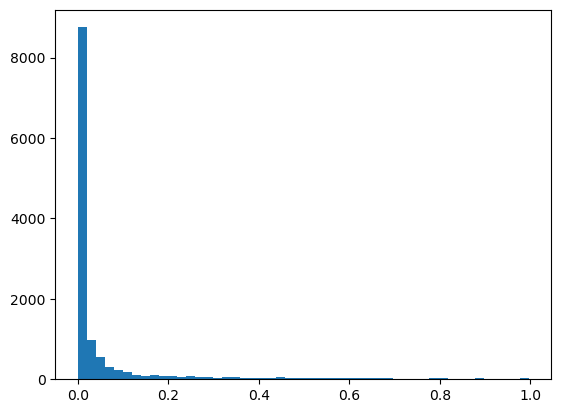

In [12]:
# there's a large concentration of samples with microplastic measurements between 0 and 1
plt.hist(df["Measurement"][df["Measurement"]< 1], bins= 50);

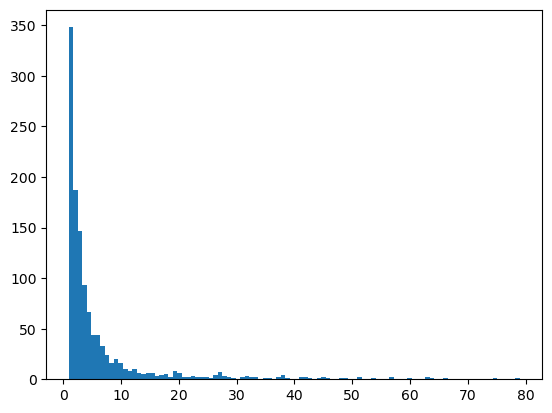

In [13]:
# histogram of values between 1 and 80
between1_and_1000= df[(df["Measurement"]>1) & (df["Measurement"]<80)]
plt.hist(between1_and_1000["Measurement"], bins= 100);

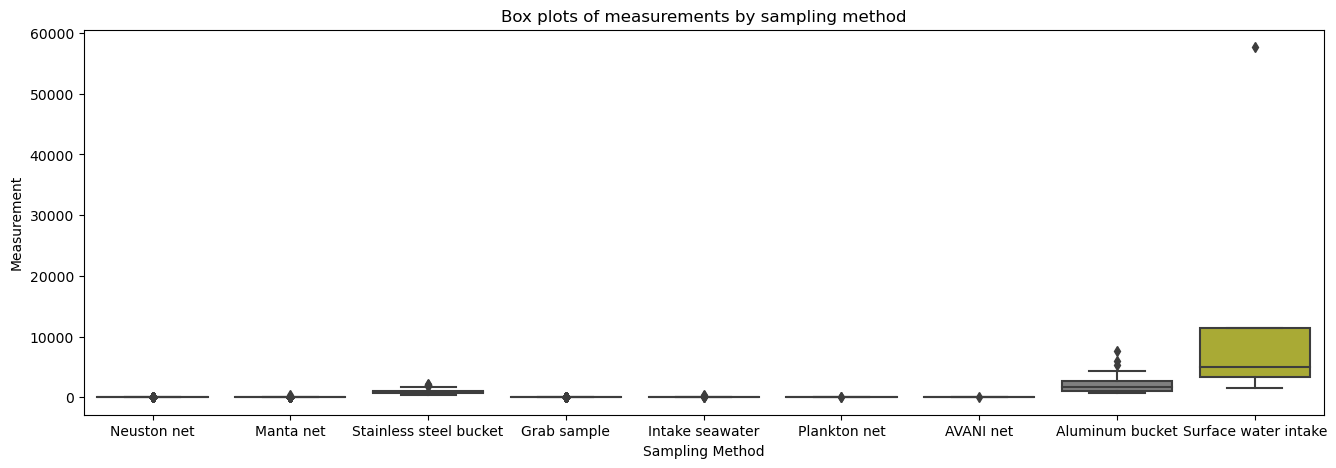

In [44]:
plt.figure(figsize=(16,5))
sns.boxplot(x='Sampling Method', y='Measurement', data=df)
plt.title('Box plots of measurements by sampling method')
plt.show()

In [48]:
X = df[['Latitude','Longitude', 'Sampling Method']]
y= df[['Measurement']].values

,FID,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,Density Class,...,Accession Number,Accession Link,GlobalID,CreationDate,Creator,EditDate,Editor,Long Reference,x,y
Date,,,,,,,,,,,,,,,,,,,,,
1972-04-20,40541,39.000,-141.017,Pacific Ocean,NaN,NaN,0.017,pieces/m3,0.005-1,Medium,...,253448,https://www.ncei.noaa.gov/access/metadata/land...,cd81c3c8-9fd5-4743-8aa7-b73bdbdd92e0,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",-1.569794e+07,4.721672e+06
1972-04-25,40544,35.617,-127.900,Pacific Ocean,NaN,NaN,0.003,pieces/m3,0.0005-0.005,Low,...,253448,https://www.ncei.noaa.gov/access/metadata/land...,b5b85e25-7403-48df-ac3f-d12b306994db,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",-1.423776e+07,4.248048e+06
1972-04-26,40535,35.000,-128.967,Pacific Ocean,NaN,NaN,0.000,pieces/m3,0-0.0005,Very Low,...,253448,https://www.ncei.noaa.gov/access/metadata/land...,af7150f8-9c60-4a68-aae0-070a3943c6a1,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",-1.435654e+07,4.163881e+06
1972-04-27,40536,34.983,-133.083,Pacific Ocean,NaN,NaN,0.000,pieces/m3,0-0.0005,Very Low,...,253448,https://www.ncei.noaa.gov/access/metadata/land...,4f71b542-c993-4d24-b6c1-79683f06dbb5,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",-1.481473e+07,4.161571e+06
1972-04-28,40537,34.983,-137.050,Pacific Ocean,NaN,NaN,0.000,pieces/m3,0-0.0005,Very Low,...,253448,https://www.ncei.noaa.gov/access/metadata/land...,e33c9700-8ea9-4df2-94ba-e44f1869f89b,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",-1.525634e+07,4.161571e+06
